In [66]:
#pip install financialanalysis

In [3]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#import financialanalysis

In [4]:
#cargamos los datos de entrada
indice = pd.read_csv("KMEAN_Centroides6K_V1.csv",index_col=[0])
data = pd.read_csv("Matriz_precios_back.csv",index_col=[0])
#veamos cuantas dimensiones y registros contiene
print("Dimensiones de los datos: {}".format(data.shape))
print("Dimensiones del indice : {}".format(indice.shape))

Dimensiones de los datos: (107, 560)
Dimensiones del indice : (6, 1)


In [5]:
indice

,Productos
0,ACEITE DE GIRASOL PUREZA X 1.5 LT.
1,PAPAS MC CAIN CORTE TRADICIONL X 400 GR
2,HARINA PUREZA 0000 VITAMINA D PC X 1KG
3,ROCIO VEGETAL LIRA CLASICO X 120 GR.
4,ALCOHOL REXONA ANTIBACTERIAL AEROSOL X 75 ML.
5,ACONDICIONADOR DOVE HIDRATACION INTENSA X400ML


In [6]:
centroides_k6=[]
for i in range(indice.shape[0]): 
    centroides_k6.append(data[indice.iloc[i,:][0]])

In [10]:
def strdate_to_floatdate(data):
#Funcion para convertir los indices de fecha en str a indices en float considerando la unidad el año y como decimales los meses (mes/12) y los dias (dias/30)
    return int(data[0:4])+int(data[5:7])/120+int(data[8:10])/3000
def regresion_lineal(x,y,j):
    X_train=np.array(list(map(strdate_to_floatdate,x)))
    fit = np.polyfit(X_train, y, deg=1)
    print ("Slope : " + str(fit[0]))
    print ("Intercept : " + str(fit[1]))
    
    
    #Fit function : y = mx + c [linear regression ]
    fit_function = np.poly1d(fit)

    #Linear regression plot
    plt.plot(x, fit_function(X_train))
    #Time series data plot
    plt.plot(x, Y_train)

    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title('Cluster N°'+str(j))
    plt.show()
    return fit_function

Slope : 5156.929449846308
Intercept : -10426981.390315017


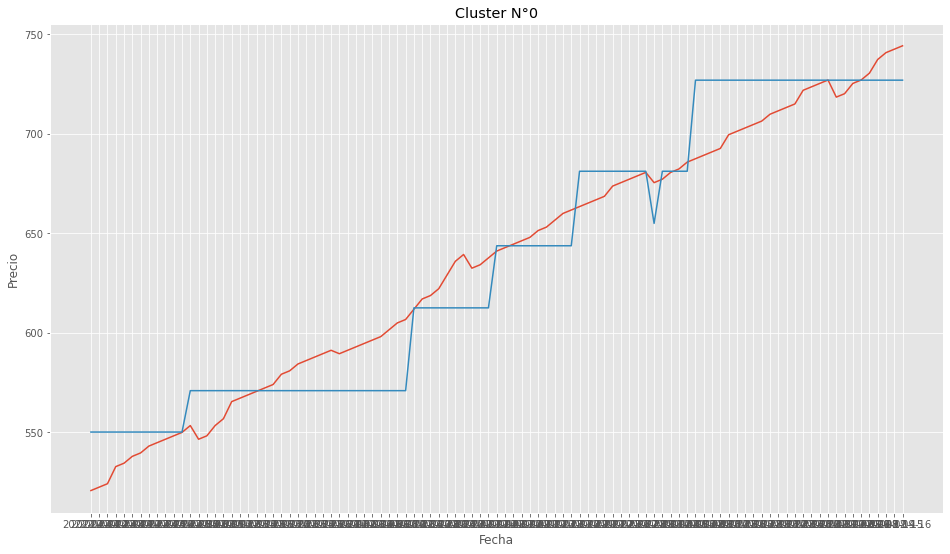

Slope : 1364.8847164476372
Intercept : -2759700.4695640486


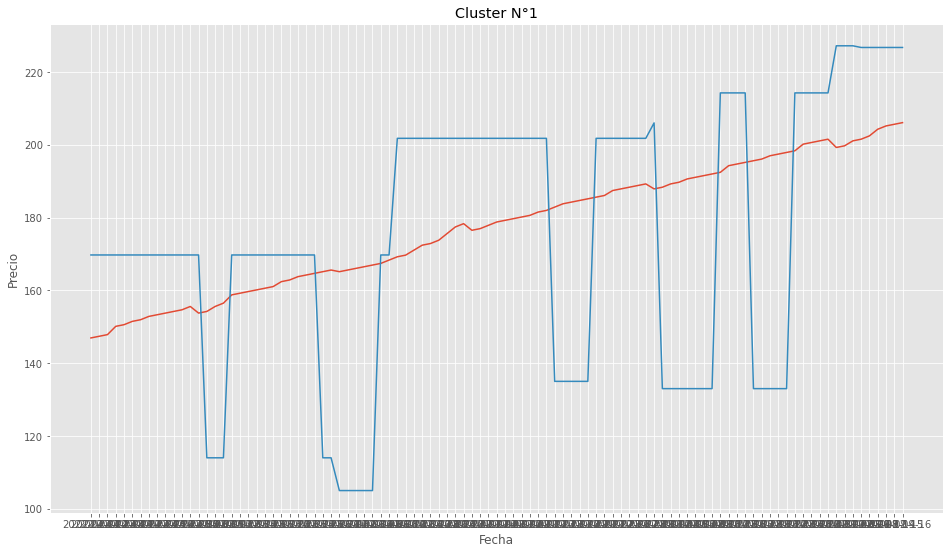

Slope : 1564.9613323944748
Intercept : -3164315.152158849


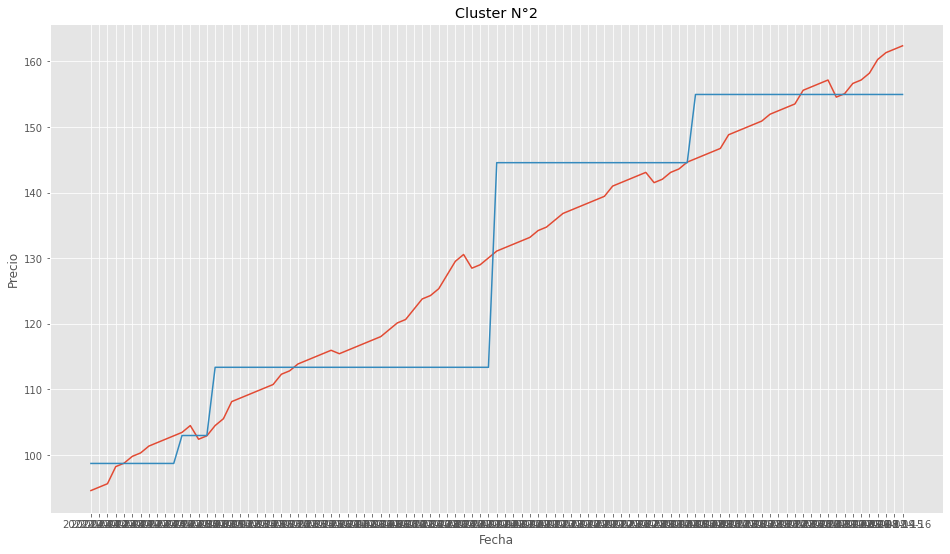

Slope : 3477.3928484825983
Intercept : -7031186.311054293


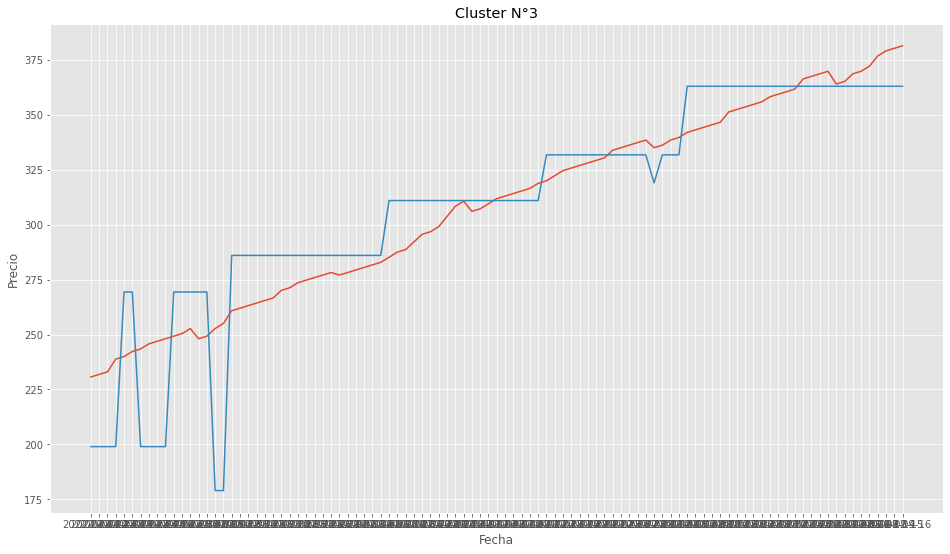

Slope : 323.12368882367144
Intercept : -653231.7626042522


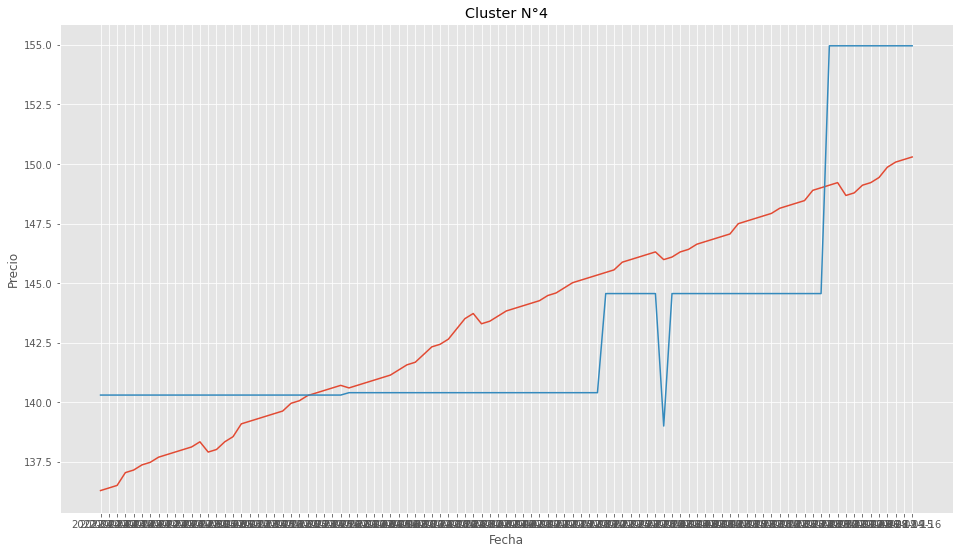

Slope : 3025.9652720984777
Intercept : -6118227.508853379


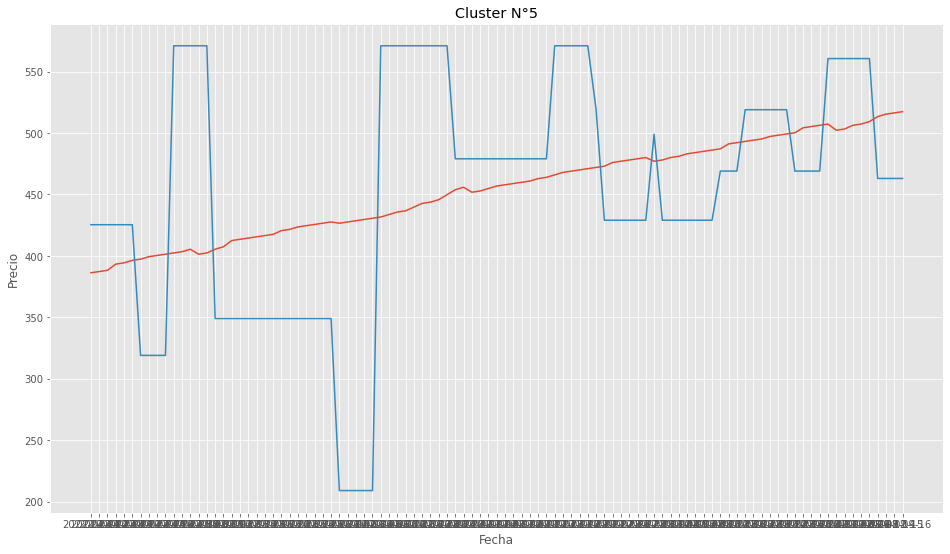

In [11]:
fit_f=[]
for i in range(len(centroides_k6)):
    X_train=np.array(centroides_k6[i].index)
    Y_train=np.array(centroides_k6[i].values)
    fit_f.append(regresion_lineal(X_train,Y_train,i))

In [13]:
for i in range(len(centroides_k6)):
    X_train=np.array(centroides_k6[i].index)

    fit_function=fit_f[0]
    prediction = fit_function(X_train.size + 14)
    print(prediction)

-9802992.926883614
-9802992.926883614
-9802992.926883614
-9802992.926883614
-9802992.926883614
-9802992.926883614
